Data Acquisition, Cleaning, and Preprocessing

Task 1: Data Acquisition   (DONE)

In [1]:
# from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Task 2: Data Cleaning and Exploration

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df['date'] = pd.to_datetime(df['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [7]:
#missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#duplicates
df.duplicated().sum()

0

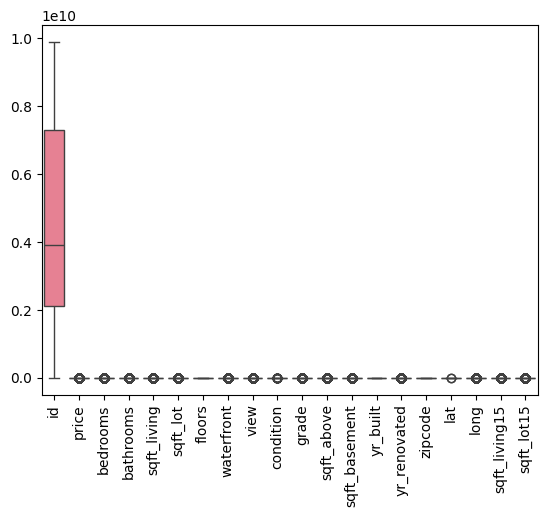

In [9]:
#outliners
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [10]:
#in case we have to clean the data
#no missing values else we would have used either df.fillna() or df.dropna().

In [11]:
#Handle outliers (capping or winsorizing)
for col in df.select_dtypes(include=[np.number]).columns:
    upper_limit = df[col].mean() + 3*df[col].std()
    lower_limit = df[col].mean() - 3*df[col].std()
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])


In [12]:
#standardizing date formate(year-month-date)
df['date'] = pd.to_datetime(df['date'])

##standardizing curruncy formate(dollars)

# df

Task 3: Data Preprocessing

In [13]:
# Feature engineering:
# Create new features that might be relevant (e.g., total living area)
#adding new column 'total_living_area'

df['total_living_area'] = df['sqft_living'] + df['sqft_lot']


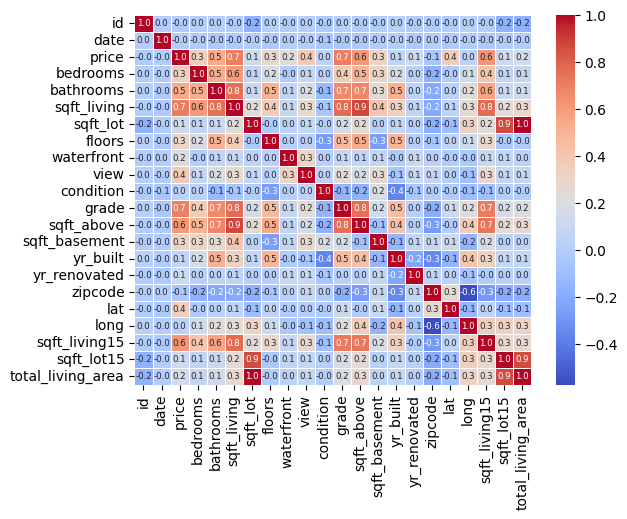

In [14]:
#Feature selection
#Identify important features using correlation analysis or feature importance from a basic model.

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 6.2}, fmt=".1f", linewidth = '0.5')
plt.show()

In [15]:
# Feature scaling:
# Normalize or standardize features.
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])
# df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21613 non-null  float64       
 1   date               21613 non-null  datetime64[ns]
 2   price              21613 non-null  float64       
 3   bedrooms           21613 non-null  float64       
 4   bathrooms          21613 non-null  float64       
 5   sqft_living        21613 non-null  float64       
 6   sqft_lot           21613 non-null  float64       
 7   floors             21613 non-null  float64       
 8   waterfront         21613 non-null  float64       
 9   view               21613 non-null  float64       
 10  condition          21613 non-null  float64       
 11  grade              21613 non-null  float64       
 12  sqft_above         21613 non-null  float64       
 13  sqft_basement      21613 non-null  float64       
 14  yr_bui

TASK 4: Model selection and training

In [17]:
# # spliting dataset into training and testing sets

# # from sklearn.model_selection import train_test_split

# X = df.drop('price', axis=1)
# y = df['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import timedelta

#datetime format
df['date'] = pd.to_datetime(df['date'])

#features from datetime column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Retain the 'date' column for future use
dates = df['date']

# Drop the original datetime column
df.drop(columns=['date'], inplace=True)

# Assuming 'price' is the name of your target variable
X = df.drop(columns=['price'])
y = df['price']

# Split the data while retaining the 'date' column
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)

# Train different regression models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f'Linear Regression MSE: {lr_mse}, R2: {lr_r2}')

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f'Decision Tree Regression MSE: {dt_mse}, R2: {dt_r2}')

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f'Random Forest Regression MSE: {rf_mse}, R2: {rf_r2}')


Linear Regression MSE: 0.25431331600508755, R2: 0.7531980917960011
Decision Tree Regression MSE: 0.24010186391507732, R2: 0.7669897938950531
Random Forest Regression MSE: 0.11208894759886734, R2: 0.8912217158325084


In [19]:
#comparing model performances:

print(f'Linear Regression MSE: {lr_mse}, R2: {lr_r2}')
print(f'Decision Tree MSE: {dt_mse}, R2: {dt_r2}')
print(f'Random Forest MSE: {rf_mse}, R2: {rf_r2}')

Linear Regression MSE: 0.25431331600508755, R2: 0.7531980917960011
Decision Tree MSE: 0.24010186391507732, R2: 0.7669897938950531
Random Forest MSE: 0.11208894759886734, R2: 0.8912217158325084


TASK 5: Model fine tuning and evaluation

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_rf_preds = best_rf.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_preds)
best_rf_r2 = r2_score(y_test, best_rf_preds)

print(f'Best Random Forest MSE: {best_rf_mse}, R2: {best_rf_r2}')

C:\Users\cdac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cdac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cdac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\cdac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", 

Best Random Forest MSE: 0.12176943900600898, R2: 0.881827147788784


TASK 6: model inference and deployment

In [22]:
# Create a DataFrame with actual prices, predicted prices, and dates
results = pd.DataFrame({
    'date': dates_test,
    'actual': y_test,
    'predicted': rf_preds
})

# Sort the results by date
results = results.sort_values(by='date')

# Simulate future dates (extending the last date by 30 days)
future_dates = [results['date'].max() + timedelta(days=i) for i in range(1, 31)]

# Use Random Forest to predict future prices (using a sample from X_test as proxy)
future_data = X_test.sample(30, random_state=42)
future_data['year'] = [date.year for date in future_dates]
future_data['month'] = [date.month for date in future_dates]
future_data['day'] = [date.day for date in future_dates]

future_predictions = rf.predict(future_data)

# Create a DataFrame for future predictions
future_results = pd.DataFrame({
    'date': future_dates,
    'predicted': future_predictions
})


In [25]:
#predictions on the unseen data:
unseen_data = X_test[:5] 
unseen_predictions = best_rf.predict(unseen_data)

# Create a DataFrame with date, actual prices, and predicted prices
unseen_results = pd.DataFrame({
    'Date': dates_test[:5],
    'Actual Price': y_test[:5], 
    'Predicted Price': unseen_predictions
})

print("Unseen Predictions:")
print(unseen_results)


Unseen Predictions:
            Date  Actual Price  Predicted Price
735   2014-10-06     -0.544735        -0.546326
2830  2014-08-21      1.124601         0.827919
4106  2014-08-15      1.702191         1.853844
16218 2015-03-31      3.211270         3.286786
19964 2014-07-14      0.610446         0.615800


FUTURE PRIDICTION:

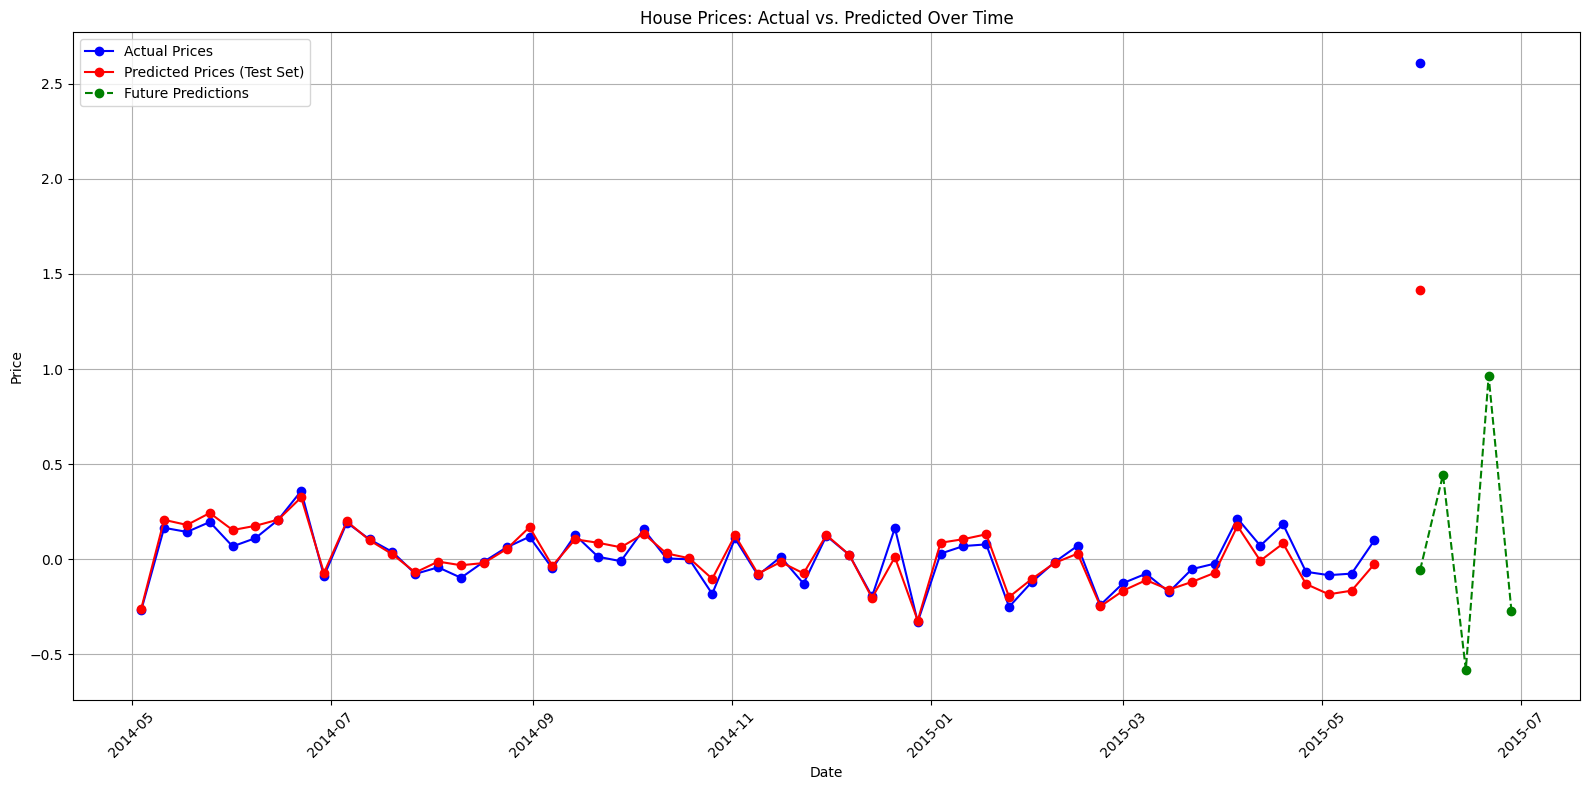

In [26]:
# Downsample the results dataframe to reduce the number of points
downsampled_results = results.groupby(pd.Grouper(key='date', freq='1W')).mean().reset_index()

# Downsample the future_results dataframe
downsampled_future_results = future_results.groupby(pd.Grouper(key='date', freq='1W')).mean().reset_index()

# Plot actual vs. predicted prices over time, including future predictions
plt.figure(figsize=(16, 8))  # Increase figure size for better clarity

# Plot actual prices
plt.plot(downsampled_results['date'], downsampled_results['actual'], label='Actual Prices', color='blue', marker='o', linestyle='-')

# Plot predicted prices on the test set
plt.plot(downsampled_results['date'], downsampled_results['predicted'], label='Predicted Prices (Test Set)', color='red', marker='o', linestyle='-')

# Plot future predictions
plt.plot(downsampled_future_results['date'], downsampled_future_results['predicted'], label='Future Predictions', color='green', marker='o', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('House Prices: Actual vs. Predicted Over Time')
plt.legend()
plt.grid(True)  
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


In [27]:
# Model Deployment Considerations:

# Serialization: Save the trained model using `joblib` or `pickle` for later use.
# Web Application Integration: Use a web framework like Flask or Django to create an API that serves the model.
# Scalability: Deploy the model on a cloud service like AWS or Azure for scalability and reliability.
